In [2]:
import sys
sys.path.append('../tools/')
from net import HWNet

In [3]:
import torch

In [4]:
from dataset import HWDataset

In [5]:
dataset = HWDataset('../data/train/')

dict initialized successfully,there's 3755 lables in the dict.
lenth of dataset is : 897725


In [11]:
dataset.vocab.lables[:10]

['一', '丁', '七', '万', '丈', '三', '上', '下', '不', '与']

In [25]:
dataset.vocab.tlables[:10][2].argmax()

tensor(2)

In [26]:
dataset.vocab.lables[dataset.vocab.tlables[:10][2].argmax()]

'七'

In [19]:
hwnet = HWNet(len(dataset.vocab))

In [20]:
hwnet.load_state_dict(torch.load('./handwriting.params'))

<All keys matched successfully>

In [21]:
from torchvision import transforms
to_img = transforms.ToPILImage()
transform = transforms.Compose([
            transforms.Resize((48,48)),
            transforms.ToTensor()
        ])

In [22]:
import PIL

In [27]:
img = PIL.Image.open('../data/test/七/10.jpg')

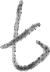

In [28]:
img

In [29]:
feature = transform(img)

In [30]:
feature=feature.reshape(1,1,48,48)

In [32]:
res = hwnet(feature)

In [33]:
res.shape

torch.Size([1, 3755])

In [38]:
res[0]

tensor([-1.0164, -0.5400, -1.1202,  ...,  0.4944, -0.4027,  0.5509],
       grad_fn=<SelectBackward0>)

In [37]:
dataset.vocab.lables[res[0].argmin()]

'夕'